In [91]:
import cv2
import os


In [105]:
abs_path="C:/Users/khali/OneDrive/Bureau/machine learning tp-td/technologies/Tp3/img"
img_1_path = os.path.join(abs_path, "tesla.jpeg")

img=cv2.imread(img_1_path)
if not img is None:
    cv2.imshow("Based Image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
else:
    print("Failed to load image!")


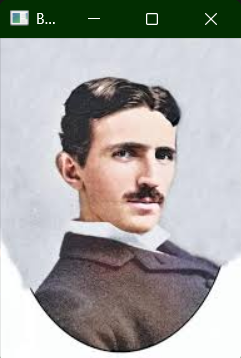

In [106]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("Based gray Image",gray)
cv2.waitKey(0)
cv2.destroyAllWindows() 


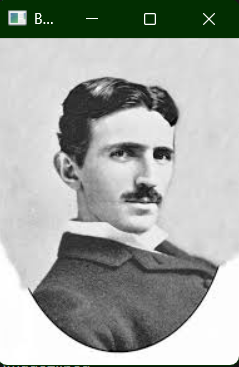

In [107]:
edges=cv2.Canny(img,100,200)
cv2.imshow("Countour of Based Image",edges)
cv2.waitKey(0)
cv2.destroyAllWindows() 


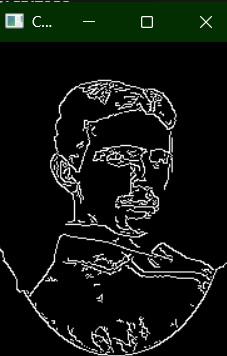

In [53]:
import numpy as np
print(img)
print(np.array(img).shape)

[[[52 52 52]
  [47 47 47]
  [48 48 48]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[ 7  7  7]
  [ 2  2  2]
  [ 8  8  8]
  ...
  [38 38 38]
  [38 38 38]
  [37 37 37]]

 [[16 16 16]
  [10 10 10]
  [10 10 10]
  ...
  [37 37 37]
  [36 36 36]
  [35 35 35]]

 ...

 [[20 20 20]
  [21 21 21]
  [24 24 24]
  ...
  [76 76 76]
  [74 74 74]
  [70 70 70]]

 [[21 21 21]
  [23 23 23]
  [24 24 24]
  ...
  [74 74 74]
  [73 73 73]
  [70 70 70]]

 [[25 25 25]
  [27 27 27]
  [23 23 23]
  ...
  [74 74 74]
  [74 74 74]
  [72 72 72]]]
(1014, 815, 3)


**qst 1**: le retourn de img=cv2.imread(img_path) est une matrice 3d => tensor de dimension (height,width,3) le nombre 3 estt les dimension de rgb , pour chaque dimension est on un couleur (r,g,b)

**qst 2**: on transform l image on gray pour diminuer les dimension est dimunuer l utilisation de memoire jusqua 1/3 de l image original 






In [100]:
def readVid(path=None):
    if path==None: 
        print("opening camera")
        cap=cv2.VideoCapture(0)
    else :
          print("opening video")
          cap=cv2.VideoCapture(path)
    while True:
        ret,frame=cap.read()
        if not ret:
            break
        cv2.imshow("WebCam" , frame)
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
readVid(path=None)


opening camera


**qst 3:** si on veut utiliser un video on vas ajouter le path de video on cv2.VideoCapture(path) , ret sera False si le video est fini est le window vas fermer apres le video est finit

In [108]:
vid_1_path = os.path.join(abs_path, "video.mp4")
readVid(vid_1_path)

opening video


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)



2.6.0+cu126
12.6


In [ ]:

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch2.6/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch2.6/index.html


ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-dev python3.10-distutils -y
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.10

pip install "'git+https://github.com/facebookresearch/detectron2.git'"

In [ ]:
# Uploader une image

import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


In [ ]:
# Configuration du modèle pré-entraîné
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
"COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
predictor = DefaultPredictor(cfg)
# Charger une image
img = cv2.imread("animals2.jpg")
# Prédiction
outputs = predictor(img)
# Visualisation
v = Visualizer(img[:, :, ::-1],
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2.imshow("Détection d'objets", out.get_image()[:, :, ::-1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()
from google.colab.patches import cv2_imshow
cv2_imshow(out.get_image()[:, :, ::-1])

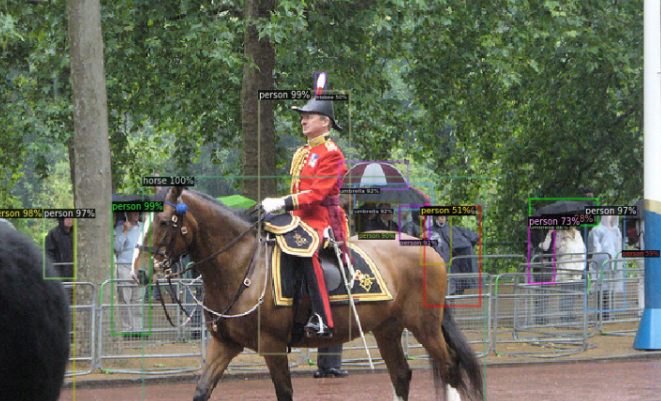

**qst 4** :seulement les predictions de valeur de confidence > SCORE_THRESH_TEST  sans l' affiche

In [ ]:
# Installer les dépendances
!apt-get install -y cmake libopenblas-dev liblapack-dev
# Installer dlib et face_recognition
!pip install dlib face_recognition

In [68]:
import face_recognition
import cv2
import os

# Absolute paths
abs_path="C:/Users/khali/OneDrive/Bureau/machine learning tp-td/technologies/Tp3/img"

def samePerson(img_ref_path,img_test_path):
    # Load images with OpenCV
    img_ref = cv2.imread(img_ref_path)
    img_test = cv2.imread(img_test_path)

    # Check if images loaded correctly
    if img_ref is None or img_test is None:
        raise FileNotFoundError("Check your image paths!")
    # Convert BGR to RGB for face_recognition
    img_ref_rgb = cv2.cvtColor(img_ref, cv2.COLOR_BGR2RGB)
    img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

    # Get face encodings
    encodage_ref = face_recognition.face_encodings(img_ref_rgb)[0]
    encodage_test = face_recognition.face_encodings(img_test_rgb)[0]

    # Compare faces
    result = face_recognition.compare_faces([encodage_ref], encodage_test)
    print("Même personne ?", result[0])


In [ ]:
img_1_path = os.path.join(abs_path, "einsten.png")
img_2_path = os.path.join(abs_path, "einstein2.jpg")
img_3_path = os.path.join(abs_path, "tesla.jpeg")
samePerson(img_1_path,img_2_path)
samePerson(img_1_path,img_3_path)
samePerson(img_3_path,img_2_path)



Même personne ? True
Même personne ? False
Même personne ? False


In [71]:
hm=["ms_ht.jpg","ms_ht_2.jpg","st_ht"]
sc=["scientists1.jpg","scientists2.jpg","scientists3.jpg"]
ts=["ts_ed","ed_ts.jpeg","ts_en.jpeg"]


In [ ]:


for ref_img in ts:
    for test_img in ts: 
        print(f"\nComparing {ref_img} with {test_img}:")
        try:
            samePerson(os.path.join(abs_path, ref_img),
                       os.path.join(abs_path, test_img))
        except IndexError:
            print("No face found in one of the images!")
        except FileNotFoundError as e:
            print(e)



Comparing ts_ed.jpg with ts_ed.jpg:
Même personne ? True

Comparing ts_ed.jpg with ed_ts.jpeg:
Même personne ? False

Comparing ts_ed.jpg with ts_en.jpeg:
Même personne ? False

Comparing ed_ts.jpeg with ts_ed.jpg:
Même personne ? False

Comparing ed_ts.jpeg with ed_ts.jpeg:
Même personne ? True

Comparing ed_ts.jpeg with ts_en.jpeg:
Même personne ? False

Comparing ts_en.jpeg with ts_ed.jpg:
Même personne ? False

Comparing ts_en.jpeg with ed_ts.jpeg:
Même personne ? False

Comparing ts_en.jpeg with ts_en.jpeg:
Même personne ? True


**qst7** si on a plusieur visage , meme si on a les meme personne on aura faux 

**qst8** dans des conditions réelles, ce système est assez fiable pour des visages clairs et frontaux, mais peut échouer pour des angles extrêmes, mauvaise lumière ou occlusions.